In [38]:
import pandas as pd
import array as arr
data=pd.read_csv(r'C:/Users\deepajay\Downloads/10000 Sales Records.csv')
print(data)
data.head()
data.describe()
data.keys()


                            Region                           Country  \
0               Sub-Saharan Africa                              Chad   
1                           Europe                            Latvia   
2     Middle East and North Africa                          Pakistan   
3               Sub-Saharan Africa  Democratic Republic of the Congo   
4                           Europe                    Czech Republic   
...                            ...                               ...   
9995                          Asia                              Laos   
9996                        Europe                     Liechtenstein   
9997            Sub-Saharan Africa  Democratic Republic of the Congo   
9998            Sub-Saharan Africa                      South Africa   
9999                          Asia                          Mongolia   

            Item_Type Sales_Channel Order_Priority  Order_Date   Order_ID  \
0     Office Supplies        Online              L   1/27/

Index(['Region', 'Country', 'Item_Type', 'Sales_Channel', 'Order_Priority',
       'Order_Date', 'Order_ID', 'Ship_Date', 'Units_Sold', 'Unit_Price',
       'Unit_Cost', 'Total_Revenue', 'Total_Cost', 'Total_Profit'],
      dtype='object')

In [39]:
from collections import Counter
code=Counter(data.Item_Type)
coss=code.most_common(100)
print(coss)
x, y=zip(*coss)
x,y=list(x),list(y)
name=pd.DataFrame(x)
sup=pd.DataFrame(y)
cot=pd.concat([name.loc[:,0],sup.loc[:,0]],axis=1)
cot.columns="Item_Type","Coss"
cot.head(12)

[('Personal Care', 888), ('Household', 875), ('Clothes', 872), ('Baby Food', 842), ('Office Supplies', 837), ('Vegetables', 836), ('Cosmetics', 834), ('Cereal', 825), ('Snacks', 816), ('Meat', 798), ('Fruits', 795), ('Beverages', 782)]


,Item_Type,Coss
0,Personal Care,888
1,Household,875
2,Clothes,872
3,Baby Food,842
4,Office Supplies,837
5,Vegetables,836
6,Cosmetics,834
7,Cereal,825
8,Snacks,816
9,Meat,798


In [40]:
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go 
init_notebook_mode(connected=True)
val=cot.Item_Type
fig={ 'data':[{'values':cot.iloc[:, 1], 'labels':val, 'name':'Item_Type','hoverinfo':'label+percent+name'
            , 'hole':.4, 'type':'pie'}],
     'layout':{
         'title':"10000 sell: status", 'annotations':[{'font':{'size': 20}, 'showarrow':False,'text':'Total',
                                'x': .5,'y': .5}]
     }
}
iplot(fig)

In [41]:
labels=x
values=y
trace=go.Pie(labels=labels,values=values,hoverinfo="label+percent",textinfo='value',
             textfont=dict(size=20),marker=dict(line=dict(color="#000000",width=2)))
iplot([trace],filename="graph of sell")

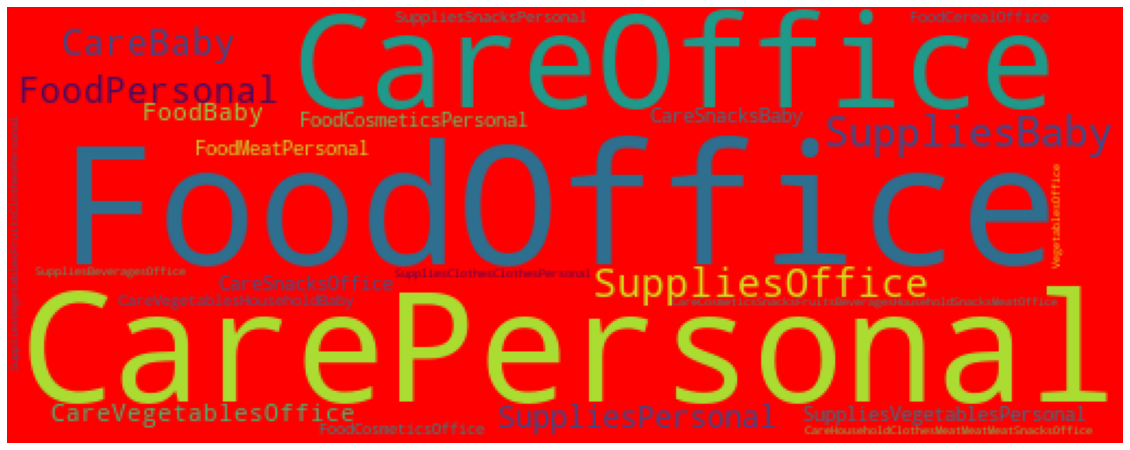

In [43]:
from wordcloud import WordCloud
import matplotlib.pyplot as mlp
periods=data.loc[(data['Order_Date']>='2/17/2010')&(data['Order_Date']<='3/29/2017')]
items=periods.Item_Type
mlp.subplots(figsize=(20,10))
wordcloud=WordCloud(background_color="red",width=512,height=200).generate("".join(items))
mlp.imshow(wordcloud)
mlp.axis('off')
mlp.show()